# Miniproyecto 3

In [322]:
 #carga de librearías
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import yellowbrick
import scipy.stats
from matplotlib.pylab import rcParams

%matplotlib inline

import scipy.spatial.distance as sdist
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import cluster,mixture
from itertools import cycle, islice
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

In [34]:
#!pip install yellowbrick

# Implementación y visualización de k-means en 2D

In [88]:
#Lectura de archivo CSV para armar el modelo
kmeans1 = pd.read_csv('kmeans1.csv')

In [89]:
#Vemos las dimensiones del dataframe
kmeans1.shape

(400, 2)

In [90]:
#muestro de los datos
kmeans1.head()

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


Text(0, 0.5, 'B')

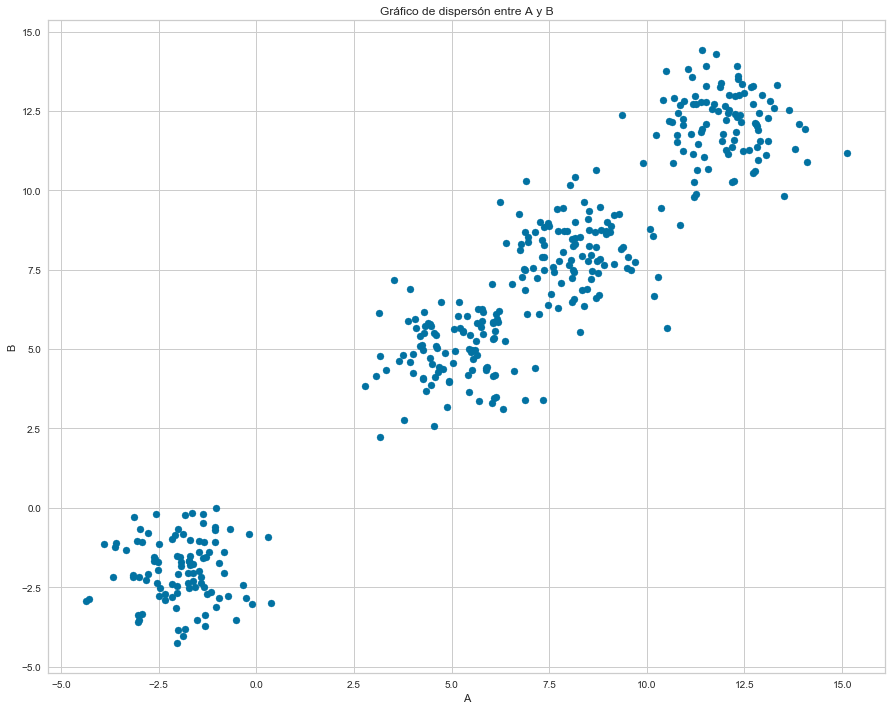

In [285]:
#Scatterplot entre A y B para visualizar clusters
plt.figure(figsize=(15,12))
plt.scatter(kmeans1['A'],kmeans1['B'])
plt.title('Gráfico de dispersón entre A y B')
plt.xlabel('A')
plt.ylabel('B')

Se observan a simplevista 4 clusters, el primero ubicado en la esquina inferior izquierda con un centroide potencial en (-1.5, -1.5), el segundo más cercano al centro del scatterplot con un centroide potencial en (5,5), después el tercero cercano al segundo pero más orientado hacia la derecha con un centroide cercano a (8,8) y finalmente un cuarto cluster en la esquina superior derecha con un potencial centroide cercano a (12,12)

In [226]:
#K-Means con 4 clusters iniciales para probar los que visualizamos
kmeans_test = KMeans(n_clusters = 4, max_iter = 2000)
kmeans_test.fit(kmeans1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [227]:
#Métricas de k-means

print('La suma de la distancia entre los cluster al cuadrado es:',kmeans_test.inertia_)
print('\nLos centroides están localizados en los siguientes puntos:',kmeans_test.cluster_centers_)
print('\nLos clústeres labels o clases son las siguientes:',kmeans_test.labels_)

La suma de la distancia entre los cluster al cuadrado es: 789.0012783558575

Los centroides están localizados en los siguientes puntos: [[ 5.06877653e+00  4.95259781e+00  2.00000000e+00]
 [ 1.19840822e+01  1.21310735e+01  3.00000000e+00]
 [-1.92438992e+00 -1.96702231e+00  1.00000000e+00]
 [ 8.20621583e+00  8.08967922e+00 -3.77475828e-15]]

Los clústeres labels o clases son las siguientes: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0

In [96]:
#Asignamos los labels del kmeans
kmeans1['clase'] = kmeans_prueba.labels_

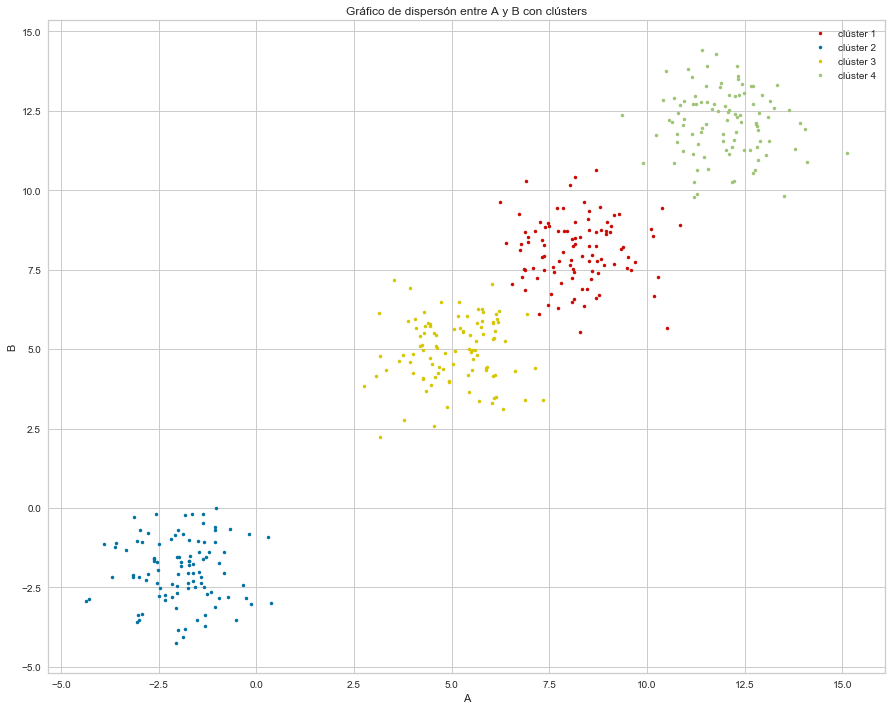

In [284]:
#Construimos grafico de dispersión para nuestro k-means de prueba
plt.figure(figsize=(15,12))
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(kmeans1['A'][kmeans1['clase']==i],kmeans1['B'][kmeans1['clase']==i],colores[i],label='clúster '+str(i+1))
plt.ylabel('B')
plt.xlabel('A')
plt.title('Gráfico de dispersón entre A y B con clústers')
plt.legend()
plt.show()

Podemos ver que efectivamente los clusters son los que identificamos en un comienzo de forma arbitraria, por lo que podemos asumir que escogimos bien a priori los clusters, sin embargo a continuación usaremos el criterio de elbow para poder evaluar de forma empírica el número óptimo de clusters

In [229]:
#eliminamos la clase determinada anteriormente
kmeans1.drop(['clase'],axis=1)

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


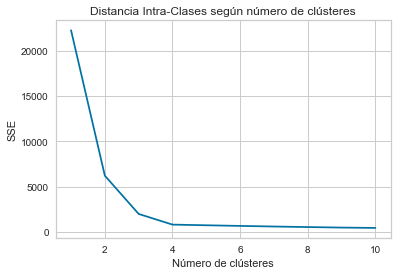

In [230]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(kmeans1)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.title('Distancia Intra-Clases según número de clústeres')
plt.show()

Podemos notar como en el cluster número 4 la gráfica cambia completamente de sentido, incluso podríamos utilizar 3 clusters, sin embargo si nos fijamos en el SSE podemos darnos cuenta que la caída abrupta ocurre entre el cluster 3 y 4, por lo que no está mal utilizar 4 clusters en este ejercicio

In [231]:
sse

{1: 22281.770475992234,
 2: 6196.737633703741,
 3: 1968.144761698196,
 4: 789.0012783558575,
 5: 716.0062358518013,
 6: 644.898686985274,
 7: 578.674643531223,
 8: 518.2836276439084,
 9: 460.6369483815176,
 10: 423.65667729119764}

# Análisis de clusters

In [234]:
# Cargamos el archivo
kmeans2 = pd.read_csv("kmeans2.csv")
#eliminamos columna que no se utilizara
kmeans2.drop(['Unnamed: 0'],axis=1,inplace=True)

#evaluamos el tipo de los datos
kmeans2.dtypes

Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [235]:
#obtenemos información sobre el dataframe
kmeans2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amplitude         5000 non-null   float64
 1   AndersonDarling   5000 non-null   float64
 2   Autocor_length    5000 non-null   int64  
 3   Beyond1Std        5000 non-null   float64
 4   Gskew             5000 non-null   float64
 5   LinearTrend       5000 non-null   float64
 6   MaxSlope          5000 non-null   float64
 7   Mean              5000 non-null   float64
 8   Meanvariance      5000 non-null   float64
 9   MedianAbsDev      5000 non-null   float64
 10  MedianBRP         5000 non-null   float64
 11  PercentAmplitude  5000 non-null   float64
 12  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 507.9 KB


In [236]:
#Muestreo de datos
kmeans2.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [237]:
#Métricas descriptivas como conteo, media, desviación cuartiles y máximos.
kmeans2.describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004851,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592765,0.005258,0.051500,0.480000,0.014187,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


### Normalización

In [238]:
#Generamos el objeto de min - max para hacer la normalización de variables
scaler = MinMaxScaler()
scaler.fit(kmeans2)

#Transformamos las variables para normalizar
kmeans_scaler = scaler.transform(kmeans2)
kmeans_scaler = pd.DataFrame(kmeans_scaler, index=kmeans2.index, columns=kmeans2.columns)

#kmeans_scaler=((kmeans2-kmeans2.min())/(kmeans2.max()-kmeans2.min()))
#Muestra de los datos
kmeans_scaler.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.011810,0.000000,0.028986,0.427995,0.549661,0.327761,0.000370,0.276117,0.009723,0.006843,0.544094,0.023519,0.001389
1,0.122232,0.000000,0.246377,0.592447,0.582665,0.327920,0.000012,0.215173,0.110845,0.093353,0.200045,0.152480,0.000077
2,0.155595,0.000000,0.000000,0.327894,0.615361,0.327701,0.000934,0.816455,0.085561,0.067449,0.540185,0.155785,0.000196
3,0.198110,0.000000,0.173913,0.699698,0.538556,0.326105,0.001963,0.270386,0.171995,0.146139,0.211774,0.168550,0.009102
4,0.002214,0.099096,0.000000,0.522011,0.543183,0.327860,0.000296,0.206016,0.001995,0.001955,0.498759,0.003382,0.000594


### K-Means

#### Diagrama de elbow

En este caso utilizaremos kmeans con la base tal como está con todas las dimensiones, para eso usaremos el criterio de elbow eligiendo aquellos cluster que generan un cambio más notorio en la curva de disminución del SSE

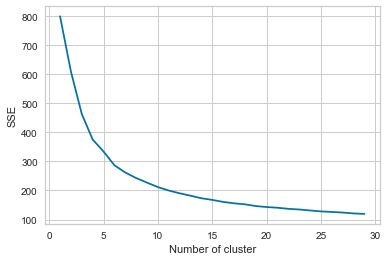

In [239]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(kmeans_scaler)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

En este caso utilizaremos un número de clusters igual a 6 puesto que en este punto vemos la forma de "codo" del gráfico, obteniendo un cambio más notorio en el SSE

#### Modelo K-Means

In [240]:
#Kmeans con 6 clusters
k_means = KMeans(n_clusters=6)
k_means.fit(kmeans_scaler)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [241]:
#Centroides
k_means.cluster_centers_

array([[1.34793277e-01, 7.85689062e-03, 1.02948526e-02, 2.90063071e-01,
        6.11495316e-01, 3.30256932e-01, 2.66209885e-02, 7.10594413e-01,
        7.87843423e-02, 5.07095426e-02, 6.57793323e-01, 1.48842700e-01,
        1.44554474e-03],
       [5.88871361e-02, 3.50857539e-02, 1.28239712e-01, 6.11534637e-01,
        5.46680881e-01, 3.27783934e-01, 1.88027476e-03, 2.32684203e-01,
        5.33648478e-02, 4.05433247e-02, 2.92409665e-01, 5.80518135e-02,
        2.36908283e-02],
       [1.40901809e-01, 2.74340959e-02, 4.75172250e-03, 6.66248378e-01,
        5.30755403e-01, 3.28064887e-01, 2.08066112e-02, 6.42192272e-01,
        1.01200793e-01, 1.01076070e-01, 2.51825627e-01, 1.11136504e-01,
        3.84859487e-04],
       [1.97890565e-02, 5.31626187e-01, 2.52160143e-02, 5.32665243e-01,
        5.44367938e-01, 3.27836063e-01, 1.91403218e-03, 2.84747380e-01,
        1.52516183e-02, 1.19391757e-02, 3.93777510e-01, 1.86296107e-02,
        2.26496482e-02],
       [5.83913282e-01, 1.72722035e-

In [242]:
#Valores de distancia intraclusters
k_means.inertia_

286.9845704013497

In [243]:
#Muestra de labels encontrados
k_means.labels_

array([5, 1, 0, ..., 1, 3, 1])

In [244]:
#Asignamos la clase
kmeans_scaler['clase'] = k_means.labels_
kmeans_scaler.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS,clase
0,0.011810,0.000000,0.028986,0.427995,0.549661,0.327761,0.000370,0.276117,0.009723,0.006843,0.544094,0.023519,0.001389,5
1,0.122232,0.000000,0.246377,0.592447,0.582665,0.327920,0.000012,0.215173,0.110845,0.093353,0.200045,0.152480,0.000077,1
2,0.155595,0.000000,0.000000,0.327894,0.615361,0.327701,0.000934,0.816455,0.085561,0.067449,0.540185,0.155785,0.000196,0
3,0.198110,0.000000,0.173913,0.699698,0.538556,0.326105,0.001963,0.270386,0.171995,0.146139,0.211774,0.168550,0.009102,1
4,0.002214,0.099096,0.000000,0.522011,0.543183,0.327860,0.000296,0.206016,0.001995,0.001955,0.498759,0.003382,0.000594,5


In [245]:
#Seteo de variables del modelo para estadísticos descriptivos
variables = ["Amplitude"
                                ,"AndersonDarling"
                                ,"Autocor_length"
                                ,"Beyond1Std"
                                ,"Gskew"
                                ,"LinearTrend"
                                ,"MaxSlope"
                                ,"Mean"
                                ,"Meanvariance"
                                ,"MedianAbsDev"
                                ,"MedianBRP"
                                ,"PercentAmplitude"
                                ,"PeriodLS"
                               ]
#Tabla con promedio simple
table_mean = pd.pivot_table(kmeans_scaler,index=["clase"]
                       ,values=variables
               ,aggfunc=np.mean)

#Tabla con mediana
table_median = pd.pivot_table(kmeans_scaler,index=["clase"]
                       ,values=variables
               ,aggfunc=np.median)

#Tabla con Varianza
table_var = pd.pivot_table(kmeans_scaler,index=["clase"]
                       ,values=variables
               ,aggfunc=np.var)

#Tabla con Desviacion estándar
table_std = pd.pivot_table(kmeans_scaler,index=["clase"]
                       ,values=variables
               ,aggfunc=np.std)

In [246]:
table_mean

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
clase,,,,,,,,,,,,,
0,0.134793,0.007857,0.010295,0.290063,0.611495,0.330257,0.026621,0.710594,0.078784,0.050710,0.657793,0.148843,0.001446
1,0.058756,0.035136,0.128474,0.611418,0.546681,0.327783,0.001881,0.232403,0.053249,0.040418,0.292601,0.057991,0.023734
2,0.140868,0.027369,0.004736,0.666278,0.530808,0.328065,0.020743,0.641357,0.101251,0.101102,0.251617,0.111071,0.000384
3,0.019789,0.531626,0.025216,0.532665,0.544368,0.327836,0.001914,0.284747,0.015252,0.011939,0.393778,0.018630,0.022650
4,0.583913,0.017272,0.189700,0.664765,0.497056,0.318331,0.002166,0.243101,0.558191,0.446289,0.221811,0.575457,0.035157
5,0.018602,0.080717,0.039332,0.490156,0.545177,0.327749,0.002190,0.281296,0.014721,0.009447,0.469293,0.020828,0.035580


### Análisis de cluster: 

Clase 0: Es aquel cluster que en promedio posee el menor índice de AndersonDarling, Beyond1Std. Mayor promedio y dentro de las mayores Amplitudes.

Clase 1: Clase con baja Amplitud, alto Autocor_length, Beyond1Std y mínimo MaxSlope.

Clase 2: Clase con bajo indice AndersonDarling, mínimo Autocor_length, alto valor de Beyond1Std y promedio alto. Mínimo PeriodLS

Clase 3: Amplitud baja, máximo indice de AndersonDarling, valor elevado de Gskew, valor bajo de MaxSlope, mínimo de varianza promedio. 

Clase 4: Valor máximo de Amplitud, bajo valor de AndersonDarling, máximo Autocor_length,mínimo Gskew. 

Clase 5: Mínimo Beyond1Std, bajo MaxSlope y Meanvariance y mínimo MeadianAbsDev.

Esto es un análisis a priori que podemos hacer de los diferentes centroides para un modelo de segmentación de 13 dimensiones.

In [247]:
table_median

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
clase,,,,,,,,,,,,,
0,0.121346,0.000000,0.000000,0.300800,0.595928,0.328000,0.004015,0.740047,0.071942,0.042522,0.641244,0.132471,0.000065
1,0.046354,0.002482,0.086957,0.599596,0.545034,0.327701,0.000716,0.230858,0.042827,0.031281,0.297786,0.045984,0.006193
2,0.137142,0.000004,0.000000,0.649646,0.538865,0.327960,0.006628,0.680695,0.096367,0.100684,0.254780,0.107214,0.000042
3,0.010186,0.501145,0.014493,0.532484,0.543954,0.327840,0.000508,0.261229,0.008032,0.005865,0.395528,0.010048,0.001508
4,0.594774,0.000000,0.173913,0.699698,0.556138,0.325436,0.000633,0.221329,0.559848,0.430352,0.210377,0.576002,0.021993
5,0.009448,0.045746,0.014493,0.499495,0.544417,0.327840,0.000889,0.276677,0.007384,0.005865,0.461991,0.011165,0.001891


In [248]:
table_var

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
clase,,,,,,,,,,,,,
0,0.007863,0.001970,0.000983,0.014872,0.004177,1.419204e-03,0.005160,0.018434,0.002447,0.001510,0.019292,0.009241,0.000104
1,0.002451,0.003898,0.019290,0.007694,0.000402,1.031911e-04,0.000015,0.007015,0.002048,0.001192,0.006314,0.002592,0.002136
2,0.003469,0.006105,0.000379,0.012953,0.001345,9.784930e-05,0.002050,0.018508,0.001611,0.001300,0.008672,0.002366,0.000052
3,0.000751,0.030120,0.000856,0.002905,0.000015,5.611552e-07,0.000036,0.019142,0.000350,0.000259,0.004425,0.000568,0.005293
4,0.029014,0.005372,0.017294,0.026016,0.039845,2.234458e-03,0.000012,0.020649,0.027867,0.027829,0.011984,0.027855,0.002518
5,0.000593,0.007897,0.002769,0.004865,0.000103,5.988190e-06,0.000018,0.009873,0.000380,0.000116,0.006377,0.000732,0.009742


In [249]:
table_std

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
clase,,,,,,,,,,,,,
0,0.088672,0.044390,0.031356,0.121951,0.064631,0.037672,0.071835,0.135772,0.049467,0.038861,0.138895,0.096129,0.010185
1,0.049506,0.062437,0.138889,0.087718,0.020052,0.010158,0.003897,0.083754,0.045253,0.034524,0.079460,0.050910,0.046220
2,0.058900,0.078137,0.019469,0.113810,0.036678,0.009892,0.045272,0.136044,0.040135,0.036055,0.093126,0.048638,0.007213
3,0.027404,0.173551,0.029260,0.053898,0.003853,0.000749,0.005959,0.138355,0.018696,0.016103,0.066524,0.023833,0.072755
4,0.170334,0.073292,0.131507,0.161294,0.199612,0.047270,0.003447,0.143697,0.166934,0.166821,0.109472,0.166899,0.050182
5,0.024353,0.088865,0.052623,0.069751,0.010151,0.002447,0.004203,0.099363,0.019484,0.010757,0.079855,0.027052,0.098702


## K-Means con PCA

Utilizaremos el modelo Kmeans pero haremos una reducción de dimensionalidad para poder armar gráficos y tener una comparación visual de los clusters que nos permitirán ver los centroides tanto para este modelo como para el clustering jerárquico

In [250]:
#generamos un nuevo dataframe sin la clase estimada por el kmeans normal
kmeans2_pca = kmeans_scaler.drop(['clase'],axis=1)

#inicializamos PCA de 2 componentes
pca=PCA(n_components=2)
pca.fit(kmeans2_pca)
kmeans2_pca=pca.transform(kmeans2_pca)
kmeans2_pca=pd.DataFrame(kmeans2_pca,columns=['x1','x2'])

In [251]:
#Muestra de datos
kmeans2_pca.head()

,x1,x2
0,-0.036717,-0.039802
1,-0.016159,0.320625
2,-0.480921,-0.284164
3,-0.077202,0.350618
4,0.095659,-0.001471


<Figure size 1080x864 with 0 Axes>

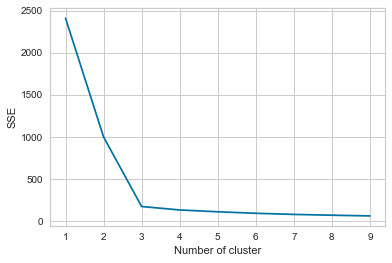

In [283]:
#Utilizamos el criterio de elbow para poder encontrar un número interesante de clusters

plt.figure(figsize=(15,12))
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(kmeans2_pca)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Podemos definir a priori que un número interesante serían 3 clusters para el modelo, puesto que la curva cambia abruptamente en este número 

In [253]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=2000).fit(kmeans2_pca)
    labels = kmeans.labels_
    print(str(k)+' clusters')
    index = davies_bouldin_score(kmeans2_pca, labels)
    print('Davies Bouldin score='+ str(index))

2 clusters
Davies Bouldin score=0.8655325699519121
3 clusters
Davies Bouldin score=0.7855494228391088
4 clusters
Davies Bouldin score=0.8286258133248054
5 clusters
Davies Bouldin score=0.8020388259989856
6 clusters
Davies Bouldin score=0.8259909635773225
7 clusters
Davies Bouldin score=0.827572381287234
8 clusters
Davies Bouldin score=0.8406846742081585
9 clusters
Davies Bouldin score=0.8603371469300696


Según el índice de Davies Bouldin corroboramos nuestra hipótesis de que el mejor número de cluster es 3 puesto que se minimiza el índice

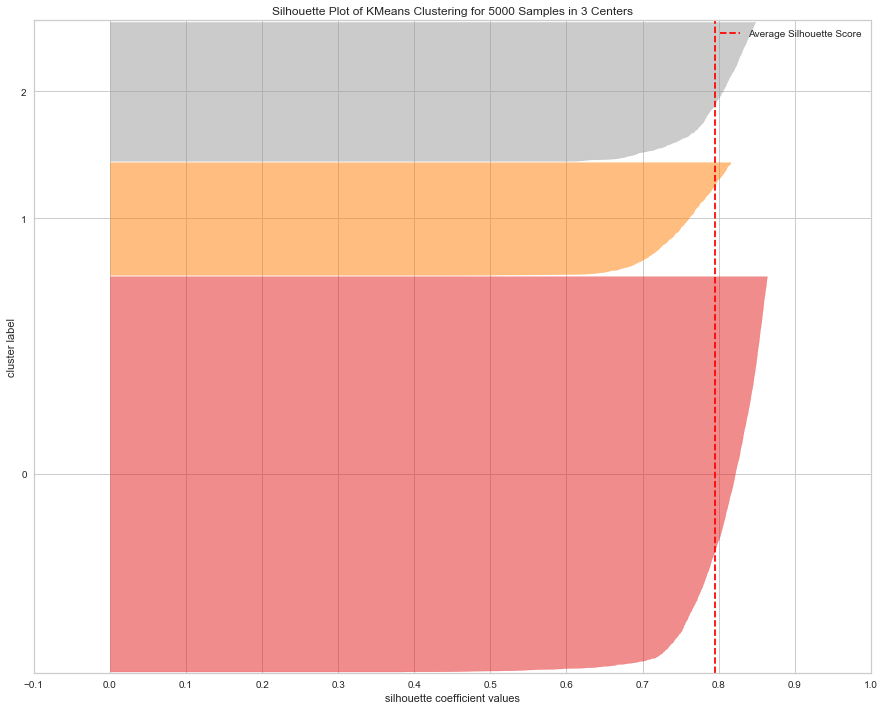

In [281]:
plt.figure(figsize=(15,12))
features = ['Rec', 'Yds', 'TD', 'Fmb']
model = KMeans(3, random_state=42)
plot = SilhouetteVisualizer(model)
plot.fit(kmeans2_pca)       
plot.show()  

Para la versión de 3 clusters podemos ver que cada cluster y nube de elementos supera la media del score de Silhouette de 0.78 aprox, acercandose a 1, lo que es buen indicador puesto que debemos tratar de alcanzar el valor 1. 

In [255]:
#armamos kmeans utilizando pca
kmeans_stars = KMeans(n_clusters=3)
kmeans_stars.fit(kmeans2_pca)
#Asignación de clusters
(kmeans_stars.labels_)

array([1, 1, 0, ..., 1, 2, 1])

In [256]:
#asignamos la clase al resultado
kmeans2_pca['clase']=kmeans_stars.labels_

[[-3.61402034e-01 -1.86962138e-01]
 [ 6.17059619e-05  1.07863223e-01]
 [ 2.93737138e-01 -1.55930639e-01]]


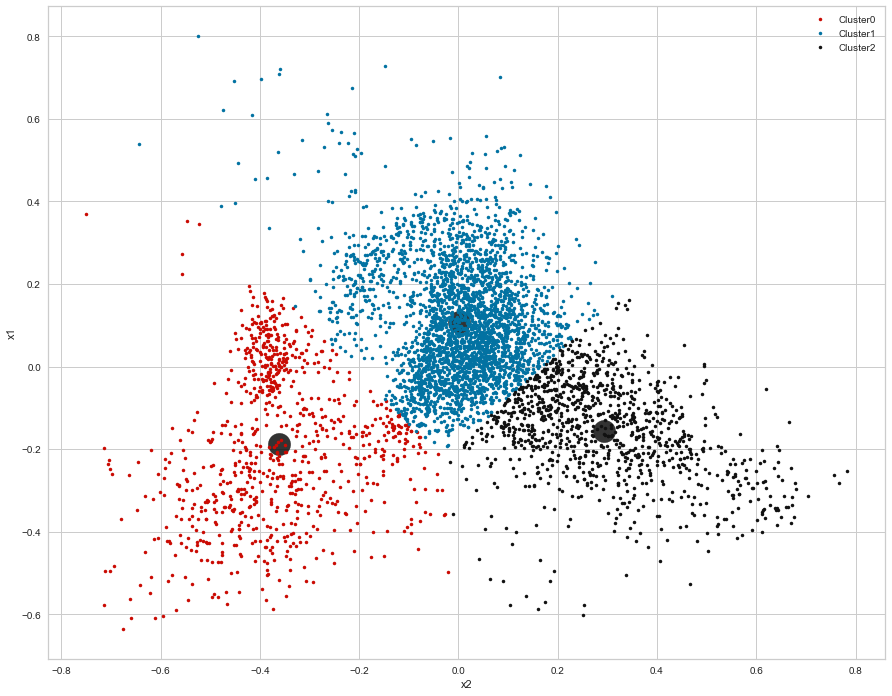

In [280]:
plt.figure(figsize=(15,12))
colores = ['r.', 'b.', 'k.']#, 'g.']#, 'k.', 'c.']
for i in range(3):
    plt.plot(kmeans2_pca['x1'][kmeans2_pca['clase'] == i], kmeans2_pca['x2'][kmeans2_pca['clase'] == i], colores[i], label = 'Cluster'+str(i))

centers_kmeans = kmeans_stars.cluster_centers_
print(centers_kmeans)

plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], s=500, color = 'black' ,alpha = 0.8)

plt.ylabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


## Hierarchical Clustering      

In [258]:
#Funcion de ploteo de dendograma vista en clase auxiliar
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    #print(linkage_matrix[0])
    dendrogram(linkage_matrix, **kwargs)

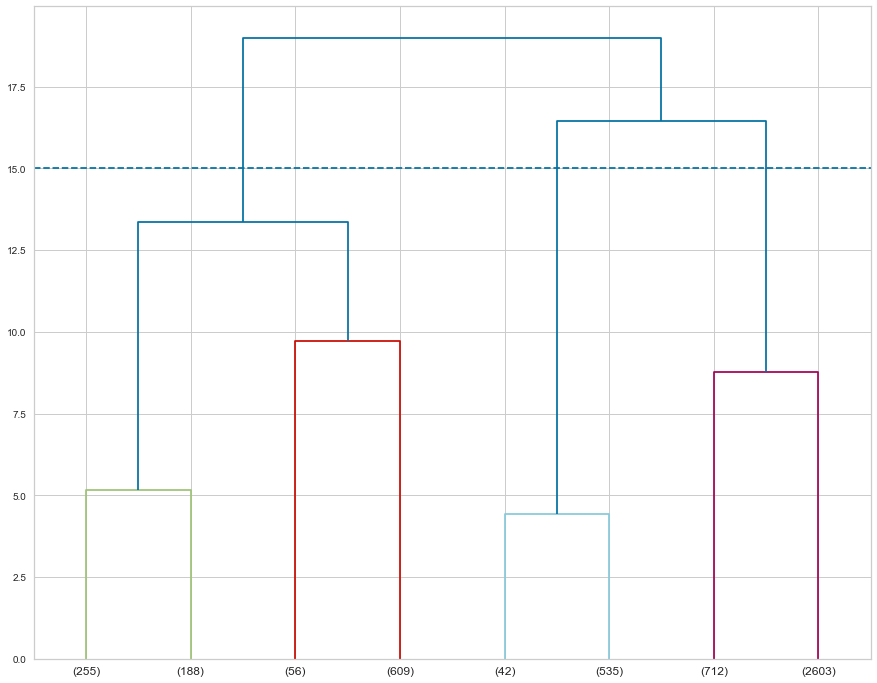

In [294]:
#Eliminamos la clase asignada para poder identificar nosotros el cluster
X = kmeans_scaler.drop(['clase'],axis=1)
plt.figure(figsize=(15,12))

#Generamos el algoritmo de clustering jerarquico
AgCluster = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)
AgCluster.fit(X)

plot_dendrogram(AgCluster, truncate_mode='level', p=2)

plt.axhline(linestyle='--', y=15) 

plt.show()

## Hierarchical clustering con PCA

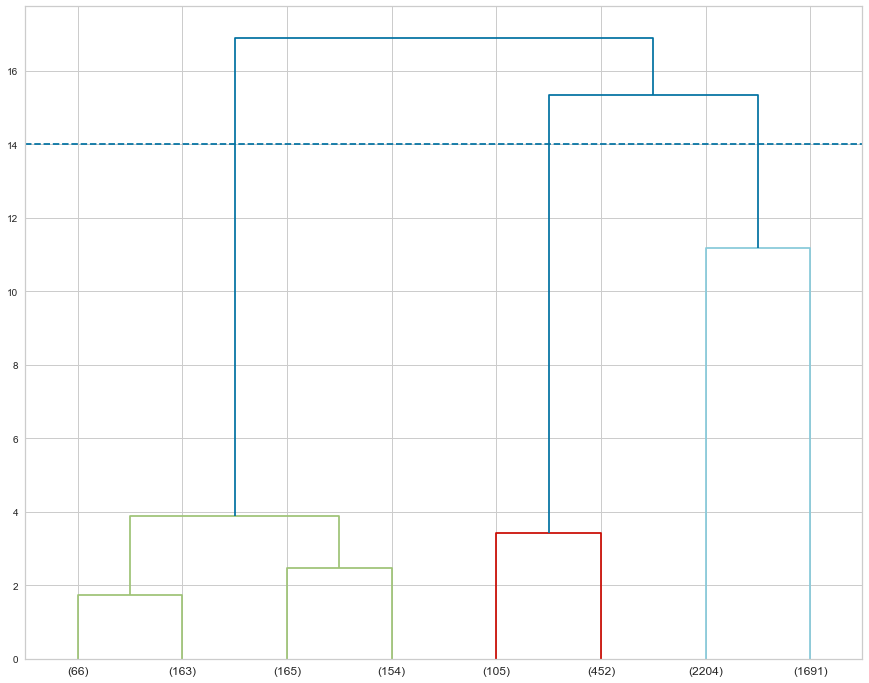

In [287]:
#eliminamos la clase para poder ejecutar el PCA y de este modo graficar el modelo
kmeans2_pca_hierarchical= kmeans2_pca.drop(['clase'],axis=1)
plt.figure(figsize=(15,12))

#ejecutamos el modelo jerarquico
AgCluster = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)
AgCluster.fit(kmeans2_pca_hierarchical)

plot_dendrogram(AgCluster, truncate_mode='level', p=2)

plt.axhline(linestyle='--', y=14) 

plt.show()

In [330]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
kmeans2_pca_hierarchical['clase'] = cluster.fit_predict(kmeans2_pca_hierarchical)

kmeans2_pca_hierarchical

,x1,x2,clase
0,-0.036717,-0.039802,0
1,-0.016159,0.320625,0
2,-0.480921,-0.284164,1
3,-0.077202,0.350618,0
4,0.095659,-0.001471,0
...,...,...,...
4995,0.129085,0.083177,0
4996,-0.012390,0.470547,0
4997,0.021582,0.149205,0
4998,0.331742,-0.135192,2


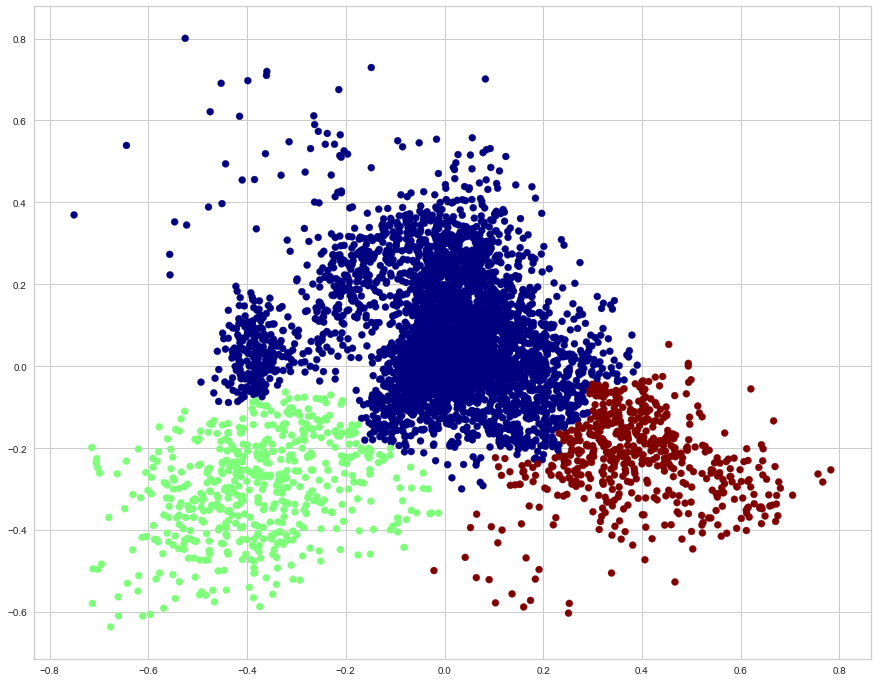

In [292]:
plt.figure(figsize=(15, 12))
plt.scatter(kmeans2_pca_hierarchical['x1'], kmeans2_pca_hierarchical['x2'], c=kmeans2_pca_hierarchical.clase, cmap='jet')

Podemos observar una separación de clusters bastante coherente con la del k-means, difieren en la asociación de algunas observaciones pero se mantiene la distribución espacial de estos

## Modelo de Mezcla de Gaussianas

Una Mezcla Gaussiana es una función que está compuesta por muchas Gaussianas, cada una identificada por k en {1, ... , K}, donde K es el número de clusters en nuestro dataset. Cada Gaussiana k en la mezcla tiene los siguientes parámetros:


La media está definida en el centro.
La covarianza se define como su ancho. Esto sería equivalente a las dimensiones de una elipsoide en un escenario multivariado.
La probabilidad Mixta que define es tán grande o pequeña como la función Gaussiana que lleva.

La relación que existe entre un GMM y K-Means radica en que podemos pensar en el primer modelo como una generación de k-means, en el que según lo anterior además podemos incluir la covarianza de los datos. La posibilidad de incorporar información como esta permite a los clusters definidos por la GMM asumir la forma de elipsoides.


Además tenemos que al trabajar con distribuciones de probabilidad, GMM entrega a cada elemento de nuestro set de datos la probabilida de pertenecer a un cluster determinado, K-means, en cambio, vincula los elementos a un determinado cluster.



In [267]:
#Normalizamos utilizando MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(kmeans2)
kmeans2_scaler_gmm = scaler.transform(kmeans2)
kmeans2_scaler_gmm = pd.DataFrame(kmeans2_scaler_gmm, index=kmeans2.index, columns=kmeans2.columns)

In [268]:
#GMM normal
gmm = GaussianMixture(n_components=10).fit(kmeans2_scaler_gmm)

#Etiquetamos resultados con labels 
labels = gmm.predict(kmeans2_scaler_gmm)
labels

array([9, 4, 0, ..., 7, 7, 7], dtype=int64)

In [269]:
#Calculamos centroides
X = kmeans2_scaler_gmm.values
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i],allow_singular=True).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

In [270]:
#Imprimimos centroides
centers

array([[1.19574845e-01, 0.00000000e+00, 0.00000000e+00, 2.99294075e-01,
        6.02097471e-01, 3.27780549e-01, 1.61584633e-03, 7.64888826e-01,
        6.78335535e-02, 4.83870968e-02, 6.10558416e-01, 1.25408789e-01,
        5.82904652e-05],
       [3.21818719e-02, 2.90213410e-01, 2.89855072e-02, 5.70996810e-01,
        5.46884639e-01, 3.27800499e-01, 4.44763758e-03, 2.86830514e-01,
        2.56803170e-02, 1.95503421e-02, 3.36882910e-01, 3.10620890e-02,
        1.86852590e-03],
       [3.33628580e-02, 1.81980451e-01, 8.69565217e-02, 5.85295487e-01,
        5.41640962e-01, 3.27700748e-01, 1.87235909e-03, 2.44507462e-01,
        2.87054161e-02, 2.15053763e-02, 3.36882910e-01, 3.08335189e-02,
        4.03282728e-02],
       [1.91614999e-01, 0.00000000e+00, 2.89855072e-02, 3.77945375e-01,
        6.58698334e-01, 3.65605985e-01, 1.22547922e-01, 7.34677020e-01,
        1.28137384e-01, 9.33528837e-02, 5.20635945e-01, 2.14574567e-01,
        1.39345670e-05],
       [7.26306466e-02, 8.31282327e-

In [271]:
#Probamos un modelo de GMM con PCA

#PCA de 2 componentes
pca=PCA(n_components=2)
pca.fit(kmeans2_scaler_gmm)
x_pca_gmm=pca.transform(kmeans2_scaler_gmm)
x_pca_gmm=pd.DataFrame(x_pca_gmm,columns=['x1','x2'])
x_pca_gmm

,x1,x2
0,-0.036717,-0.039802
1,-0.016159,0.320625
2,-0.480921,-0.284164
3,-0.077202,0.350618
4,0.095659,-0.001471
...,...,...
4995,0.129085,0.083177
4996,-0.012390,0.470547
4997,0.021582,0.149205
4998,0.331742,-0.135192


In [272]:
#Para poder comparar con K-Means y Clustering Jerárquico, utilizamos N = 3
gmm = GaussianMixture(n_components=3)
gmm.fit(x_pca_gmm)
labels = gmm.predict(x_pca_gmm)
labels

array([0, 0, 2, ..., 0, 1, 0], dtype=int64)

In [273]:
# Calculamos los centroides
X = x_pca_gmm.values 
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

In [274]:
#Imprimimos centroides
centers

array([[ 0.01552352,  0.07770879],
       [ 0.28051332, -0.11694154],
       [-0.35139268, -0.10883865]])

In [316]:
x_pca_gmm['clase'] = labels
x_pca_gmm

,x1,x2,clase
0,-0.036717,-0.039802,0
1,-0.016159,0.320625,0
2,-0.480921,-0.284164,2
3,-0.077202,0.350618,0
4,0.095659,-0.001471,0
...,...,...,...
4995,0.129085,0.083177,0
4996,-0.012390,0.470547,0
4997,0.021582,0.149205,0
4998,0.331742,-0.135192,1


[[ 0.01552352  0.07770879]
 [ 0.28051332 -0.11694154]
 [-0.35139268 -0.10883865]]


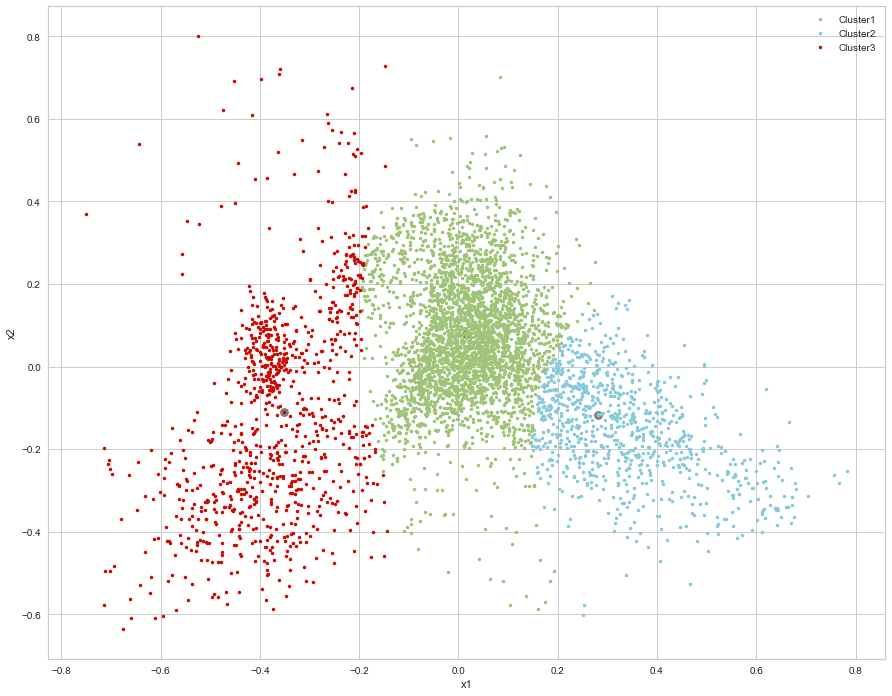

In [293]:
#Graficamos clústeres
fig = plt.figure(figsize=(15,12))

colores = ['g.', 'c.', 'r.']
for i in range(3):
    plt.plot(x_pca_gmm['x1'][labels == i], x_pca_gmm['x2'][labels == i], colores[i], label = 'Cluster'+str(i+1))

print(centers)

plt.scatter(centers[:, 0], centers[:, 1], s=70, color = 'black' , alpha = 0.5)
plt.ylabel('x2')
plt.xlabel('x1')
plt.legend()
plt.show()

Vemos que se repite el patrón de los casos anteriores, esto puede deberse a que estamos utilizando el número óptimo de centroides para los modelos

## Comparación K-Means & Hierarchical Clustering & GMM 

Como hemos visto en secciones anteriores, los resultados de k-means y cluster jerárquico son bastante similares sobre el mismo dataset. Puede darse que al tener un dataset amplio obtengamos diferencias pequeñas en la diagramación de los clusters. Sin embargo, a pesar de todos los aspectos en común existen varias diferencias entre estos modelos.

Categoría:        K-Means (Basado en centroides) / Jerárquico (aglomerativo)

Método para encontrar el óptimo: K-means(Elbow) / Jerárquico (Dendograma)

Aproximación direccional: K-means(ninguna, se considera el centroide del cluster) / Jerárquico(Top-down, bottom-up)




Por esto podemos darnos cuenta al revisar los gráficos del K-Means versus Hierarchical con un PCA de 2 dimensiones que los clusters son bastante parecidos, en general tienden a cambiar en el segundo cluster ampliandose más en uno que en otro. 


El mismo fenómeno podemos apreciarlo al compararlos con el GMM que utiliza mezcla de distribuciones gaussianas y además incorpora aspectos como la media y la desviación estándar, generando un cambio que impacta a su vez en la distribución de los clusters. En los 3 casos podemos apreciar que un número aceptable de centroides es 3 puesto que tenemos un índice de Davies Boulding mínimo, criterio de elbow óptimo y además distancias amplias para el caso del dendograma

### K-Means PCA = 2

[[-3.61402034e-01 -1.86962138e-01]
 [ 6.17059619e-05  1.07863223e-01]
 [ 2.93737138e-01 -1.55930639e-01]]


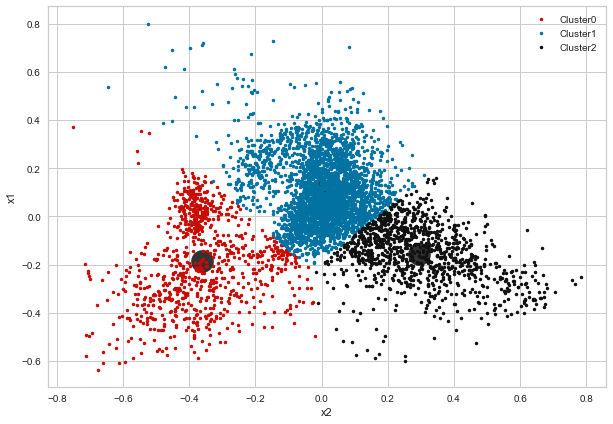

In [297]:
plt.figure(figsize=(10,7))
colores = ['r.', 'b.', 'k.']#, 'g.']#, 'k.', 'c.']
for i in range(3):
    plt.plot(kmeans2_pca['x1'][kmeans2_pca['clase'] == i], kmeans2_pca['x2'][kmeans2_pca['clase'] == i], colores[i], label = 'Cluster'+str(i))

centers_kmeans = kmeans_stars.cluster_centers_
print(centers_kmeans)

plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], s=500, color = 'black' ,alpha = 0.8)

plt.ylabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


### Hierarchical PCA = 2

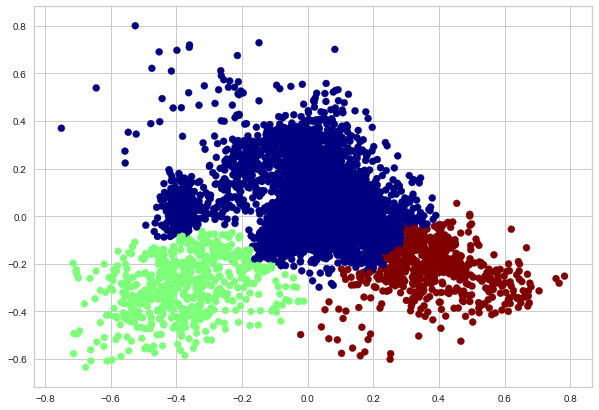

In [299]:
plt.figure(figsize=(10, 7))
plt.scatter(kmeans2_pca_hierarchical['x1'], kmeans2_pca_hierarchical['x2'], c=kmeans2_pca_hierarchical.clase, cmap='jet')

### GMM PCA = 2

[[ 0.01552352  0.07770879]
 [ 0.28051332 -0.11694154]
 [-0.35139268 -0.10883865]]


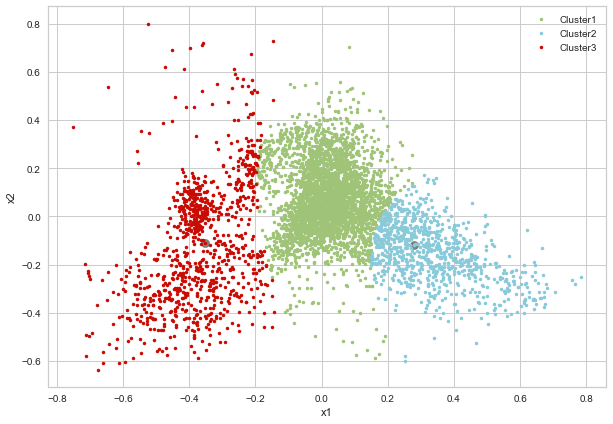

In [300]:
#Graficamos clústeres
fig = plt.figure(figsize=(10,7))

colores = ['g.', 'c.', 'r.']
for i in range(3):
    plt.plot(x_pca_gmm['x1'][labels == i], x_pca_gmm['x2'][labels == i], colores[i], label = 'Cluster'+str(i+1))

print(centers)

plt.scatter(centers[:, 0], centers[:, 1], s=70, color = 'black' , alpha = 0.5)
plt.ylabel('x2')
plt.xlabel('x1')
plt.legend()
plt.show()

In [317]:
print('Davies Boulding K-Means PCA = 2: ', davies_bouldin_score(kmeans2_pca.drop('clase', axis=1), kmeans2_pca['clase']))
print('\nDavies Boulding Hierarchical PCA = 2: ', davies_bouldin_score(kmeans2_pca_hierarchical.drop('clase', axis=1), kmeans2_pca_hierarchical['clase']))
print('\nDavies Boulding GMM PCA = 2: ', davies_bouldin_score(x_pca_gmm.drop('clase', axis=1), x_pca_gmm['clase']))





Davies Boulding K-Means PCA = 2:  0.7854944182354485

Davies Boulding Hierarchical PCA = 2:  0.6650871876612934

Davies Boulding GMM PCA = 2:  0.8769590731218955


In [328]:
#Distancia espacial a los centroides K-Means
pointskmeans = kmeans2_pca.drop('clase', axis=1)
centroidskmeans = kmeans_stars.cluster_centers_
distk_means = sdist.norm(pointskmeans - centroidskmeans[kmeans2_pca['clase']])


#Distancia espacial a los centroides Hierarchical
pointsgmm = x_pca_gmm.drop('clase', axis=1)
centroidsgmm = centers
distgmm = sdist.norm(pointsgmm - centroidsgmm[x_pca_gmm['clase']])

distk_means, distgmm

(13.163153614257176, 14.18541078676645)

En este caso podemos observar que el modelo que mejor arma la clusterización es el hierarchical clustering con un PCA de 2 puesto que minimiza el índice de Davies Boulding, junto con minimizar a su vez la distancia que existe entre las observaciones y sus centroides, para el caso anterior también podemos comparar las distancias entre el K-means y GMA y vemos que K-means ofrece una mejor solución que el último, siendo consecuentes con el índice de Davies Boulding utilizado con anterioridad